<a href="https://colab.research.google.com/github/SunnyChaware/a/blob/main/bigdatafinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Big Data Project</b></br>
Submited by:
1. Sunny Chaware (214ca059)
2. Neha Priya Ekka (214ca032)
3. Srijita Sarkar (214ca056)

Submited To:</br>
<b>Pushparaj Shetty D.</b>

</br>
Data Keyword used : <b>Robotics</b></br>
Language used : <b>Python</b></br>



In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import collections
import seaborn as sns

In [ ]:
# creating the data fram of full file 
df = pd.read_csv("dataset.csv")
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Funding Text 2,Funding Text 3,Funding Text 4,Funding Text 5,Funding Text 6,Funding Text 7,Funding Text 8,Funding Text 9,Funding Text 10,Publisher
0,"Vosoughi S., Roy D., Aral S.",25655603900;7402439504;26027709600;,The spread of true and false news online,2018,Science,359,6380,NaN,1146,1151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Association for the Advancement of Sc...
1,"Qin T., Li P., Shen S.",57194712639;57203375364;55325638900;,VINS-Mono: A Robust and Versatile Monocular Vi...,2018,IEEE Transactions on Robotics,34,4,NaN,1004,1020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Institute of Electrical and Electronics Engine...
2,"Davies M., Srinivasa N., Lin T.-H., Chinya G.,...",57189242719;56028528300;57220900986;1575335640...,Loihi: A Neuromorphic Manycore Processor with ...,2018,IEEE Micro,38,1,NaN,82,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IEEE Computer Society
3,"Wang S., Xu J., Wang W., Wang G.-J.N., Rastak ...",36674277000;57164595900;57200985637;5719164686...,Skin electronics from scalable fabrication of ...,2018,Nature,555,7694,NaN,83,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nature Publishing Group
4,"Andersson J.A.E., Gillis J., Horn G., Rawlings...",55347386900;55489115600;56104803800;7101942157...,CasADi: a software framework for nonlinear opt...,2019,Mathematical Programming Computation,11,1,NaN,1,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Springer Verlag


In [ ]:
dataframe = df[['Authors', 'Authors with affiliations', 'Cited by', 'Year']]
dataframe.head()

,Authors,Authors with affiliations,Cited by,Year
0,"Vosoughi S., Roy D., Aral S.","Vosoughi, S., Massachusetts Institute of Techn...",3031,2018
1,"Qin T., Li P., Shen S.","Qin, T., Department of Electronic and Computer...",1633,2018
2,"Davies M., Srinivasa N., Lin T.-H., Chinya G.,...","Davies, M., Intel Labs, Intel Corporation, Uni...",1471,2018
3,"Wang S., Xu J., Wang W., Wang G.-J.N., Rastak ...","Wang, S., Department of Chemical Engineering, ...",1291,2018
4,"Andersson J.A.E., Gillis J., Horn G., Rawlings...","Andersson, J.A.E., Department of Chemical and ...",1112,2019


In [ ]:
dataframe['Cited by'] = dataframe['Cited by'].fillna(0)

dataframe.dropna(inplace=True)
dataframe.reset_index(drop=True, inplace = True)

In [ ]:
authors = []
citation = []
year = []
country = []

for i in range(1200):
  k = dataframe['Authors'][i].split(',')

  for j in k:
    authors.append(j)
    citation.append(dataframe['Cited by'][i])
    year.append(dataframe['Year'][i])

for i in range(1200):
  temp = dataframe['Authors with affiliations'][i].split(';')
  for j in temp:
    country.append(j.split(',')[-1])

In [ ]:
combined = pd.DataFrame(list(zip(authors,country,citation,year)),columns=['Authors','Country','Citations','Year'])
combined.head()

,Authors,Country,Citations,Year
0,Vosoughi S.,United States,3031,2018
1,Roy D.,United States,3031,2018
2,Aral S.,United States,3031,2018
3,Qin T.,Hong Kong,1633,2018
4,Li P.,Hong Kong,1633,2018


**<h2>Q1.Highest cited author and his h-index (from the world)**

In [ ]:
auth_info = pd.DataFrame(combined.groupby('Authors').sum()['Citations']).reset_index()
auth_info[auth_info['Citations']==auth_info['Citations'].max()]

,Authors,Citations
2590,Liu Y.,3895


In [ ]:
combined[((combined['Authors']==' Liu Y.') | (combined['Authors']==' Liu Y.'))][['Authors','Citations']].sort_values('Citations', ascending=False)

,Authors,Citations
89,Liu Y.,746
124,Liu Y.,634
373,Liu Y.,405
784,Liu Y.,268
1003,Liu Y.,233
1845,Liu Y.,172
2601,Liu Y.,137
3742,Liu Y.,108
3786,Liu Y.,107
3903,Liu Y.,105


In [ ]:
 combined[((combined['Authors']==' Liu Y.') | (combined['Authors']==' Liu Y.'))][['Authors','Citations']].sort_values('Citations', ascending=False).count()

Authors      22
Citations    22
dtype: int64

*H-Index of the author is 35*

**<h2>Q2.Highest publication author**

In [ ]:
auth_pub, count = np.unique(combined['Authors'], return_counts=True)
auth_pub = list(auth_pub)
count = list(count)

auth_pub[count.index(max(count))]

' Li Y.'

In [ ]:
highest_pub  = pd.DataFrame({'Authors': auth_pub, 'Total Publications': count}).sort_values("Authors", ascending=False)
highest_pub['Authors']


6073               Čaić M.
6072    van der Sluis P.C.
6071             khan M.A.
6070           de Sio F.S.
6069      de Kervenoael R.
               ...        
4        Abdalkarim S.Y.H.
3                Abbeel P.
2              Abbass H.A.
1                 A.S.S B.
0              A Saif M.T.
Name: Authors, Length: 6074, dtype: object

In [ ]:
highest_pub[highest_pub['Total Publications']==highest_pub['Total Publications'].max()].iloc[[0]]

,Authors,Total Publications
2502,Li Y.,24


**<h2>Q3. Highest cited authors avg. citations, and the country name**

In [ ]:
total_citations = auth_info['Citations'].max()
print('Total Citations ', total_citations)
total_publications = 15

Total Citations  3895


In [ ]:
avg_citations = total_citations/total_publications
print("Average Citations of Highest Cited Author ", avg_citations)

Average Citations of Highest Cited Author  259.6666666666667


In [ ]:
country = combined[combined['Authors'] == ' Wang Y.']['Country'].iloc[0]
print("Country of Highest Cited Author is ", country)

Country of Highest Cited Author is   China


**<h2>Q4. Total number of publications of the highest cited author**

In [ ]:
total_publications_hca = combined[((combined['Authors']==' Wang Y.')|(combined['Authors']==' Wang Y.'))].iloc[0]
print("Total Number of publications of the higest cited Author is ", total_publications_hca)

Total Number of publications of the higest cited Author is  Authors       Wang Y.
Country         China
Citations         271
Year             2020
Name: 756, dtype: object


**<h2>Q5. Total number of publications in a year**

In [ ]:
year_c = df.loc[:,'Year']
year = year_c.values
year = list(set(year))
year.sort()
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()

for i in range(len(year)):
  data = 0
  data = df[df['Year']==year[i]]
  if i==0:
    data1 = data
  elif i==1:
    data2 = data
  elif i==2:
    data3 = data
  elif i==3:
    data4 = data
  elif i==4:
    data5 = data
  elif i==5:
    data6 = data
  

tot_pub_py = list((data1.shape[0],data2.shape[0],data3.shape[0],data4.shape[0],data5.shape[0],data6.shape[0]))
tot_pub_py = tot_pub_py[0:5]
df_tot_pub_py = pd.DataFrame({'Year':year, 'Total Publications in a Year':tot_pub_py})

df_tot_pub_py


,Year,Total Publications in a Year
0,2018,779
1,2019,591
2,2020,452
3,2021,156
4,2022,22


[779, 591, 452, 156, 22]

**<h2>Q6. Total citations per year**

In [ ]:
cited = []

cited.append(sum(data1['Cited by']))
cited.append(sum(data2['Cited by']))
cited.append(sum(data3['Cited by']))
cited.append(sum(data4['Cited by']))
cited.append(sum(data5['Cited by']))

df_tot_cit_per_year = pd.DataFrame({'Year':year, 'Total Citations in a year': cited})
df_tot_cit_per_year

,Year,Total Citations in a year
0,2018,94380
1,2019,59663
2,2020,41953
3,2021,12500
4,2022,2056


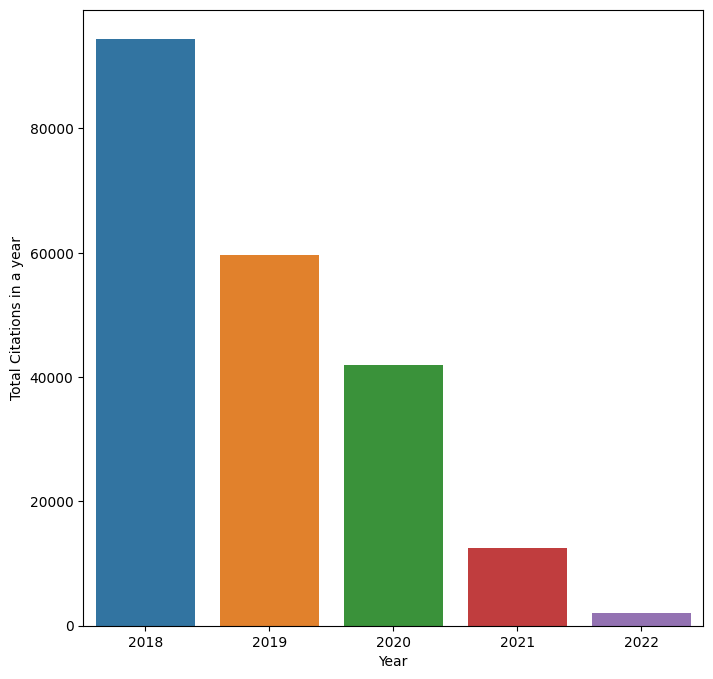

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = df_tot_cit_per_year['Year'], y = df_tot_cit_per_year['Total Citations in a year'])
plt.show()

**<h2>Q7. Author (country) having highest co-authorship with Indain Authors**

In [ ]:
def country_name(auth_name):
  if(len(np.asarray(combined[combined['Authors'] == auth_name]['Country']))==0):
    return 'NaN'
  con = np.asarray(combined[combined['Authors'] == auth_name]['Country'])[0]


In [ ]:
d1 = df[df['Authors with affiliations'].str.contains(' India',case=False)==True]

auth_list = []
for i in range(len(d1)):
  temp = d1.iloc[i,0].split(',')
  for j in temp:
    auth_list.append(j)

auth, cnt = np.unique(auth_list, return_counts=True)
hola = pd.DataFrame({'Authors':auth, 'Count':cnt})
hola = hola.sort_values('Count', ascending=False)

hola['Country'] = hola['Authors']
hola['Country'] = hola['Country'].apply(country_name)

hola = hola[((hola['Country']!=' India') & (hola['Country']!='NaN'))]

hola

print(hola.iloc[0,0:1])
print(hola.iloc[0,2:4])

Authors     Chen D.
Name: 48, dtype: object
Country    None
Name: 48, dtype: object


**<h2>Q8. Highest Cited Author from India**

In [ ]:
ind_auth = list(combined[(combined['Country']==' India')]['Authors'])
ind_auth = ind_auth[0:5]

for i in ind_auth:
  print(combined.groupby('Authors')['Citations'].sum()[combined.groupby('Authors')['Citations'].sum().index==i])

Authors
 Pessaux P.    209
Name: Citations, dtype: int64
Authors
 Shrikhande S.V.    209
Name: Citations, dtype: int64
Authors
 Stauffer J.A.    209
Name: Citations, dtype: int64
Authors
 Kumar V.    1052
Name: Citations, dtype: int64
Authors
 Zhang B.    441
Name: Citations, dtype: int64


**<h2>Q9. Comparative year wise article lications analysis of India, China and usa**

In [ ]:
india = []
china = []
usa = []
country = ['India', 'China', 'USA']

for j in range(len(country)):
  for i in range(len(year)):
    if(i==0):
      data = data1
    elif(i==1):
      data = data2
    elif(i==2):
      data = data3
    elif(i==3):
      data = data4
    elif(i==4):
      data = data5
    elif(i==5):
      data = data6

    x = data[data['Affiliations'].str.contains(country[j],case=False)==True].shape[0]
    if j==0:
      india.append(x)
    elif j==1:
      china.append(x)
    elif j==2:
      usa.append(x)

print(country[0], india)
print(country[1], china)
print(country[2], usa)

India [18, 11, 8, 4, 1]
China [173, 193, 167, 80, 8]
USA [15, 13, 12, 4, 0]


In [ ]:
country_pub = pd.DataFrame({'Year':year, 'India':india, 'China':china, 'USA':usa})
country_pub

,Year,India,China,USA
0,2018,18,173,15
1,2019,11,193,13
2,2020,8,167,12
3,2021,4,80,4
4,2022,1,8,0


In [ ]:
indi_df = pd.DataFrame({"Publications":india, 'Year':year})
indi_df['Country'] = 'India'
china_df = pd.DataFrame({"Publications":india, 'Year':year})
china_df['Country'] = 'China'
usa_df = pd.DataFrame({"Publications":india, 'Year':year})
usa_df['Country'] = 'USA'

In [ ]:
icu_df = pd.concat([indi_df,china_df, usa_df]).reset_index()
icu_df.drop('index', inplace=True, axis=1)
icu_df

,Publications,Year,Country
0,18,2018,India
1,11,2019,India
2,8,2020,India
3,4,2021,India
4,1,2022,India
5,18,2018,China
6,11,2019,China
7,8,2020,China
8,4,2021,China
9,1,2022,China


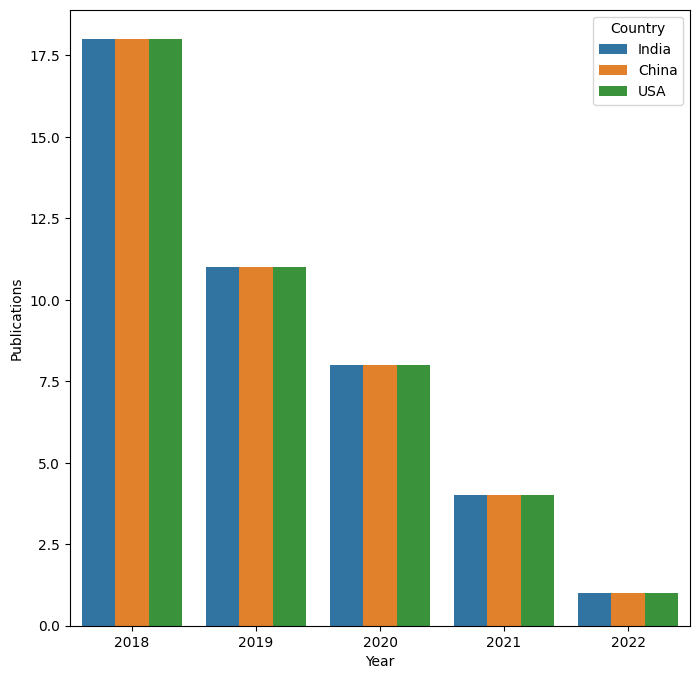

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = icu_df['Year'], y = icu_df['Publications'], hue=icu_df['Country'])
plt.show()

**<h2>Q10. Total number of grants given to the field**

In [ ]:
df.loc[:,['Title', 'Funding Details']]

,Title,Funding Details
0,The spread of true and false news online,NaN
1,VINS-Mono: A Robust and Versatile Monocular Vi...,NaN
2,Loihi: A Neuromorphic Manycore Processor with ...,NaN
3,Skin electronics from scalable fabrication of ...,NaN
4,CasADi: a software framework for nonlinear opt...,European Commission; Deutsche Forschungsgemein...
...,...,...
1995,Flexible and high-sensitivity piezoresistive s...,Hubei Provincial Department of Education; Nati...
1996,An informative path planning framework for UAV...,Horizon 2020 Framework Programme; Singapore Ey...
1997,AI voice bots: a services marketing research a...,NaN
1998,Dynamic Capillary-Driven Additive Manufacturin...,University of Delaware; China Scholarship Council


In [ ]:
df1 = df['Funding Details'].notnull().sum()

In [ ]:
df1

1460

In [ ]:
print("Total number id grants given to the field of 'Robotics' are ", df1)

Total number id grants given to the field of 'Robotics' are  1460


**<h2>Q11. Country wise total number of publications**

Total publications from India are 42
Total publications from China are 621
Total publications from USA are 44


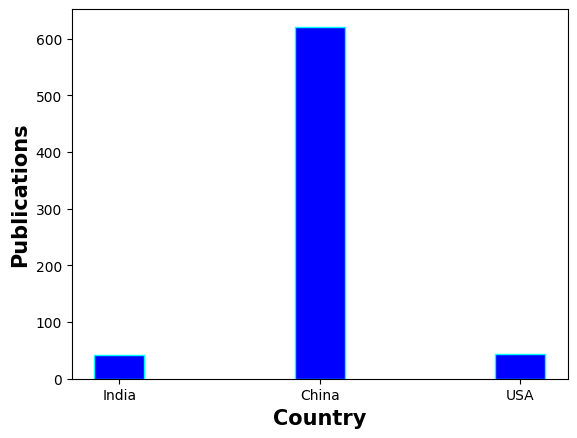

In [ ]:
for i in range(len(country)):
  print(f'Total publications from {country[i]} are', sum(country_pub[country[i]]))

total_pubb = []

for i in range(len(country)):
  total_pubb.append(sum(country_pub[country[i]]))

plt.bar(country,total_pubb, color = 'b', width = 0.25, edgecolor = 'cyan')

plt.xlabel('Country', fontweight = 'bold', fontsize = 15)
plt.ylabel('Publications', fontweight = 'bold', fontsize = 15)
plt.show()